In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import merged dataset

In [3]:
path = "C:/Users/amira/OneDrive - University of Leeds/Projects/Palindrome/Market Segmentation/Data/DHS/"
output_path = "C:/Users/amira/OneDrive - University of Leeds/Projects/Palindrome/Market Segmentation/Code/Output Data/"

In [4]:
df_loaded = pd.read_csv(output_path + "DHS_Kenya_merged.csv")

# Select variables

(OLD) See: 
https://docs.google.com/spreadsheets/d/1GCDTz2RqwAVSSgYs2E2pDD-ZKYWSzK-TuxdjNvzRRKs/edit#gid=0


In [5]:
# Variables available for SA but not for Kenya
# [
    ### target_dict
    # 'who_pays_medication',
    # 'post_birth_check_source',
    ### demog_dict
    # 'has_bank_account',
    ### context_dict
    # 'has_health_insurance_AHS',
    # 'internet_use_ever',
    # 'freq_internet_last_month',
    # 'uses_phone_transactions',
    # 'owns_mobile_phone',
    # 'hiv_result',
    # 'hiv_sample_weight',
# ]

# # ALSO:
# [
# ## dental
#     's1405a',
#     's1405b',
#     's1405c',
#     's1405d',
#     's1405e',
#     's1405f',
#     's1405g',
#     's1405h',
#     's1405i',
#     's1405j',
#     's1405k',
#     's1405x',
# ]


target_dict = {
    "v829": "last_hiv_test_facility",
    # not yet used
    # "s1452": "who_pays_medication",  # AHS
    ### NEW - all new women's variables
    "v326": "family_planning_last_source",
    "v3a07": "family_planning_first_source",
    "v842": "antenatal_hiv_test_source",  # duplicated info from both other vars?
    "m15_1": "place_of_delivery",
    # "m69_1": "post_birth_check_source",
    "m73_1": "baby_first_check_source",
}

new_onehot_target_list = [
    # OneHot encoded variables (raw DHS)
    # use these to construct simple priv/pub variables
    ### dental
    # "s1405a",
    # "s1405b",
    # "s1405c",
    # "s1405d",
    # "s1405e",
    # "s1405f",
    # "s1405g",
    # "s1405h",
    # "s1405i",
    # "s1405j",
    # "s1405k",
    # "s1405x",
    # antenatal_source
    "m57a_1",
    "m57b_1",
    "m57e_1",
    "m57f_1",
    "m57g_1",
    "m57h_1",
    "m57m_1",
    "m57n_1",
    "m57x_1",
    # 'baby_fevercough_source'
    "h32a_1",
    "h32b_1",
    "h32c_1",
    "h32d_1",
    "h32e_1",
    "h32j_1",
    "h32k_1",
    "h32l_1",
    "h32m_1",
    "h32s_1",
    "h32t_1",
    "h32u_1",
    "h32x_1",  # h32y_1 h32z_1 deleted
    # 'sought_sti_advice_source'
    "v770a",
    "v770b",
    "v770c",
    "v770d",
    "v770k",
    "v770l",
    "v770m",
    "v770n",
    "v770t",
    "v770u",
    "v770v",
    "v770x",
]

demog_dict = {
    "v013": "age_group",
    "v131": "ethnicity",
    "v190": "wealth_bracket",
    "v149": "education_attainment",
    "v025": "urban_rural",
    # 'v716':'occupation',
    "v717": "occupation_group",
    "v202": "sons_at_home",
    "v203": "daughters_at_home",
    # new
    "v745a": "homeowner",
    # "v170": "has_bank_account",
    # new new
    "v104": "years_in_residence",
    "v150": "relationship_to_head",
    "v151": "sex_of_head",
    "v152": "age_of_head",
    "v155": "literacy",
    "v501": "marital_status",
}

context_dict = {
    # Health Insurance
    "v481": "has_health_insurance_DHS",  # DHS
    # "s1402": "has_health_insurance_AHS",  # AHS
    # information access
    # "v171a": "internet_use_ever",  ## this is [never, in last year, before last year]
    # "v171b": "freq_internet_last_month",  ## this is more reflective of real useage.
    "v157": "freq_newspaper_mag",  # frequency of reading newspaper or magazine
    "v158": "freq_radio",  # frequency of listening to radio
    "v159": "freq_tv",  # frequency of watching television
    # "v169b": "uses_phone_transactions",  # use mobile telephone for financial transactions
    # new new
    # "v169a": "owns_mobile_phone",
    "v312": "current_contraceptive_method",
    "v525": "age_at_first_sex",
    "v750": "ever_heard_of_sti",
    "v751": "ever_heard_of_aids",
    "v763a": "had_sti_past_year",
    "v781": "ever_hiv_tested",
    "v783": "know_place_hiv_test",
    "v785": "heard_of_other_sti",
    # old new
    "v761": "used_condom_last",
    # HIV vars
    # "hiv03": "hiv_result",
    # "hiv05": "hiv_sample_weight",
    # 's1404':'last_month_received_healthcare', # AHS
}

geog_dict = {
    # 'ADM3_EN':'municipality',
    "ADM2_EN": "district",
    "ADM1_EN": "region",
    "v024": "region_from_survey",
}

other_dict = {
    "v135": "visitor_or_not",
    "v005": "dhs_sample_weight",
    "v021":'dhs_primary_sampling_unit',
    "v023":"dhs_sample_stratum"
}

# combine all into one dict
rename_dict = {}
rename_dict.update(target_dict)
rename_dict.update(demog_dict)
rename_dict.update(context_dict)
rename_dict.update(geog_dict)
rename_dict.update(other_dict)
# rename_dict

# get lists of new variable names
ids = ["cluster", "household", "line"]
targets = list(target_dict.values()) + new_onehot_target_list
demogs = ["gender"] + list(demog_dict.values())
contexts = list(context_dict.values())
geogs = list(geog_dict.values())
others = (
    [
    "source_dhs", 
    # "source_ahs", 
    # "source_hiv"
    ] 
    + list(other_dict.values())
)

# combine
all_chosen = ids + others + targets + demogs + contexts + geogs


In [6]:
vars_not_in_kenya = [var for var in rename_dict.keys() if var not in df_loaded.columns]
[rename_dict[var] for var in vars_not_in_kenya]

[]

In [7]:
df_chosen = df_loaded.rename(rename_dict, axis=1)[all_chosen]

In [8]:
len(all_chosen)

80

In [9]:
print("Observations with DHS data:", df_chosen.query("source_dhs == 1").shape[0])
# print("Observations with AHS data:", df_chosen.query("source_ahs == 1").shape[0])
# print(
#     "Observations with DHS and AHS data:",
#     df_chosen.query("source_dhs == 1 and source_ahs == 1").shape[0],
# )
# print(
#     "Observations with DHS and AHS and HIV data:",
#     df_chosen.query("source_dhs == 1 and source_ahs == 1 and source_hiv == 1").shape[0],
# )

Observations with DHS data: 43898


In [10]:
df = df_chosen


# Process data
Group variables together, make proxies, filter, etc.

### Normalise sample weights

dhs_sample_weight

In [10]:
df["dhs_sample_weight"] = df["dhs_sample_weight"] / 1000000

# df[df["dhs_sample_weight"].isnull()][["source_dhs", "source_ahs", "source_hiv"]]

In [11]:
df["dhs_primary_sampling_unit"].count()

43898

In [12]:
df["dhs_sample_stratum"].count()

43898

hiv_sample_weight

In [13]:
# var = "hiv_sample_weight"

# df["hiv_sample_weight"] = df["hiv_sample_weight"] / 1000000

# # df[var].value_counts().plot.barh()
# print(df[var].shape[0], df[var].count())

### Age filter

In [14]:
df.value_counts("age_group")


age_group
15-19    8889
25-29    7881
20-24    7386
30-34    6153
35-39    5354
40-44    4184
45-49    3246
50-54     805
dtype: int64

In [15]:
# restrict age - filter out >49s
df = df[~((df.age_group == "50-54") | (df.age_group == "55-59"))]


### Visitor filter
Keep people with this field missing.

In [16]:
df.value_counts("visitor_or_not")


visitor_or_not
usual resident    42106
visitor             982
dtype: int64

In [17]:
df = df[~(df.visitor_or_not == "visitor")]


### Get n_children_at_home

In [18]:
# df['sons_at_home'].value_counts()
df["n_children_at_home"] = df["sons_at_home"] + df["daughters_at_home"]


### New features

years_in_residence

<AxesSubplot:>

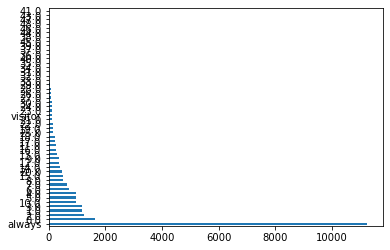

In [19]:
var = "years_in_residence"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


In [20]:
df[var].replace(
    {
        "always": 999,
        "visitor":0
    }, 
    inplace=True)

relationship_to_head

<AxesSubplot:>

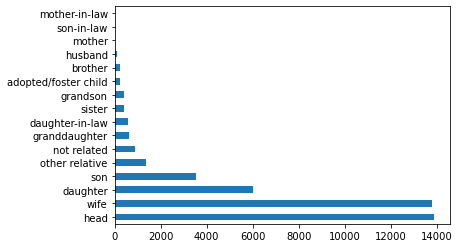

In [21]:
var = "relationship_to_head"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


sex_of_head

<AxesSubplot:>

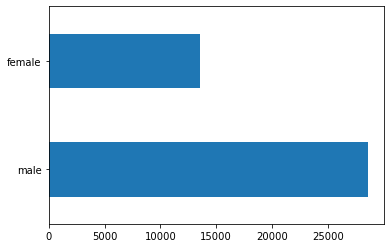

In [22]:
var = "sex_of_head"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


age_of_head

<AxesSubplot:>

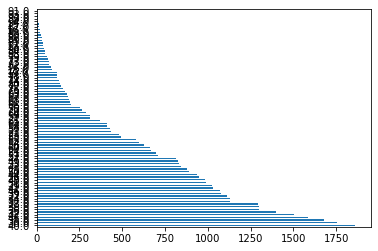

In [23]:
var = "age_of_head"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


In [24]:
df[var].replace({"don't know": np.nan}, inplace=True)


literacy

['able to read whole sentence',
 'cannot read at all',
 'able to read only parts of sentence',
 nan,
 'blind/visually impaired',
 'no card with required language']

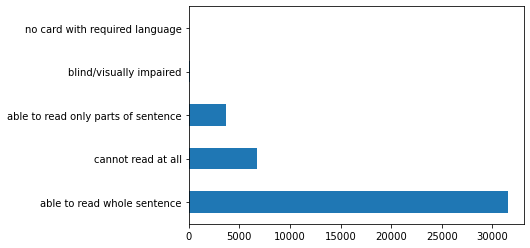

In [25]:
var = "literacy"

df[var].value_counts().plot.barh()
df[var].unique().tolist()


In [26]:
df[var].replace(
    {"no card with required language": np.nan, "blind/visually impaired": np.nan},
    inplace=True,
)


marital_status

<AxesSubplot:>

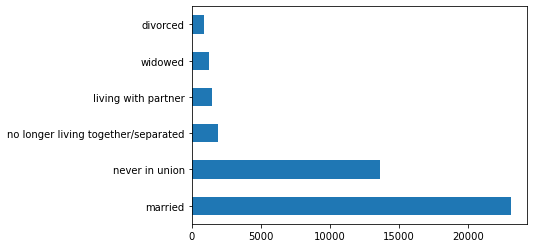

In [27]:
var = "marital_status"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


owns_mobile_phone

In [28]:
# var = "owns_mobile_phone"

# df[var].value_counts().plot.barh()
# # df[var].unique().tolist()


current_contraceptive_method

<AxesSubplot:>

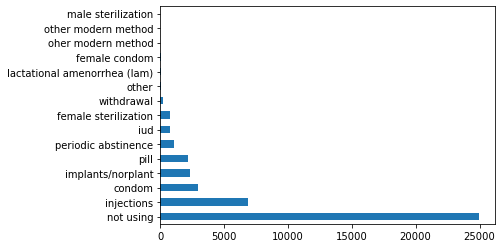

In [29]:
var = "current_contraceptive_method"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


age_at_first_sex

<AxesSubplot:>

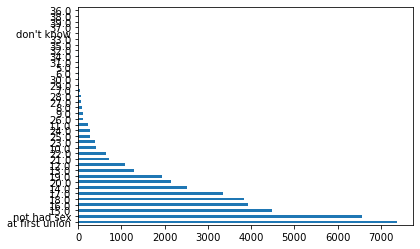

In [30]:
var = "age_at_first_sex"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

In [31]:
df[var].replace(
    {
        # replace with average age for marriage (for women)
        # ****this is Not Robust*****
        # ncbi.nlm.nih.gov/pmc/articles/PMC6760660/
        'at first union':18, 
        "not had sex": 999,
        "don't know":np.nan
    }, 
    inplace=True)

ever_heard_of_sti

<AxesSubplot:>

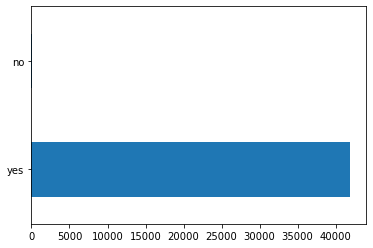

In [32]:
var = "ever_heard_of_sti"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


ever_heard_of_aids

<AxesSubplot:>

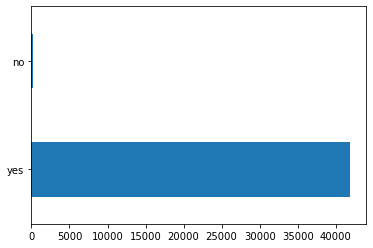

In [33]:
var = "ever_heard_of_aids"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


had_sti_past_year

['no', nan, 'yes', "don't know"]

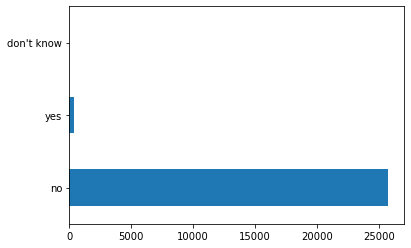

In [34]:
var = "had_sti_past_year"

df[var].value_counts().plot.barh()
df[var].unique().tolist()


In [35]:
df[var].replace({"don't know": np.nan}, inplace=True)


ever_hiv_tested

<AxesSubplot:>

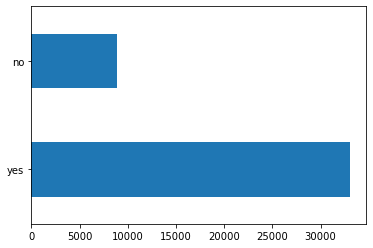

In [36]:
var = "ever_hiv_tested"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

know_place_hiv_test

<AxesSubplot:>

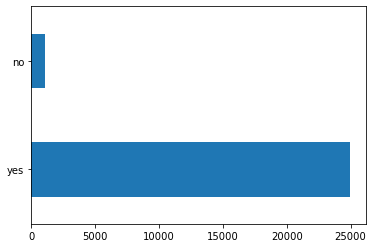

In [37]:
var = "know_place_hiv_test"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()

heard_of_other_sti

<AxesSubplot:>

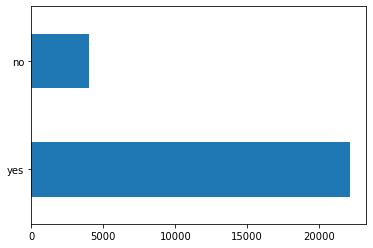

In [38]:
var = "heard_of_other_sti"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


used_condom_last

<AxesSubplot:>

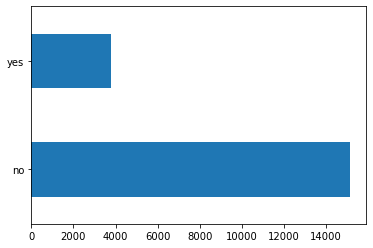

In [39]:
var = "used_condom_last"

df[var].value_counts().plot.barh()
# df[var].unique().tolist()


hiv_result

In [40]:
# var = "hiv_result"

# df[var].value_counts().plot.barh()
# # df[var].unique().tolist()


In [41]:
# df[var].replace(
#     {"hiv negative": "negative", "hiv  positive": "positive", "inconclusive": np.nan},
#     inplace=True,
# )

### Information/technology access variables

In [42]:
# df["freq_internet_last_month"].value_counts().plot.barh()
# df["freq_internet_last_month"].unique().tolist()


In [43]:
# # Internet use (last month)
# df["used_internet_last_month"] = df["freq_internet_last_month"].replace(
#     {
#         "not at all": "no",
#         "almost every day": "yes",
#         "at least once a week": "yes",
#         "less than once a week": "yes",
#     }
# )


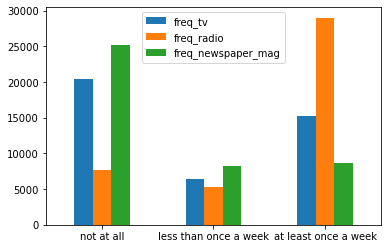

freq_tv  freq_radio  freq_newspaper_mag
not at all               20428        7724               25151
less than once a week     6410        5345                8286
at least once a week     15246       29032                8648

In [44]:
tv_radio_newspaper_value_counts = (
    df["freq_tv"]
    .value_counts()
    .to_frame()
    .join(df["freq_radio"].value_counts())
    .join(df["freq_newspaper_mag"].value_counts())
)
tv_radio_newspaper_value_counts = tv_radio_newspaper_value_counts.reindex(
    ["not at all", "less than once a week", "at least once a week"]
)

tv_radio_newspaper_value_counts.plot.bar(rot=0)
plt.show()

tv_radio_newspaper_value_counts


In [45]:
# make new vars
df[["reads_newspaper_mag", "listens_radio", "watches_tv"]] = df[
    ["freq_newspaper_mag", "freq_radio", "freq_tv"]
].replace(
    {"not at all": "no", "at least once a week": "yes", "less than once a week": "yes"}
)
# check
# df[['reads_newspaper_mag','listens_radio','watches_tv']]


In [46]:
# df["uses_phone_transactions"].value_counts()


### Demographics

#### education_attainment

<AxesSubplot:>

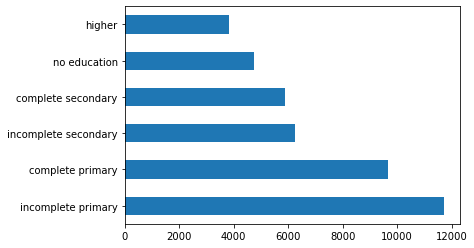

In [47]:
df["education_attainment"].value_counts().plot.barh()


##### Employed

In [48]:
df["occupation_group"].unique().tolist()


['services',
 nan,
 'professional/technical/managerial',
 'household and domestic',
 'not working',
 'skilled manual',
 'unskilled manual',
 'agriculture - self employed',
 'agricultural - self employed',
 'clerical']

In [49]:
df["employed"] = df["occupation_group"].replace(
    {
        "not working": "unemployed",  # unemployed
        "clerical": "employed",
        "skilled manual": "employed",
        "unskilled manual": "employed",
        "household and domestic": "employed",
        "professional/technical/managerial": "employed",
        "don't know": np.nan,  # unknown
        "agriculture - unskilled": "employed",
        "services": "employed",
        "agricultural - unskilled": "employed",
        "agricultural - self employed": "employed",
        "agriculture - self employed": "employed",
    }
)

# df['employed']

##### Homeowner

['does not own', nan, 'alone only', 'jointly only', 'both alone and jointly']

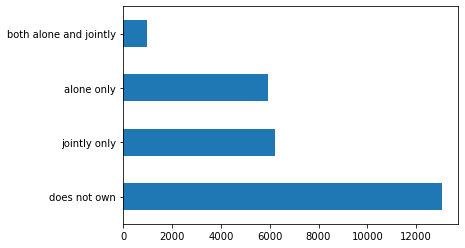

In [50]:
df["homeowner"].value_counts().plot.barh()
df["homeowner"].unique().tolist()


In [51]:
df["homeowner"] = df["homeowner"].replace(
    {
        "does not own": "no",
        "both alone and jointly": "yes",
        "alone only": "yes",
        "jointly only": "yes",
    }
)

# df['homeowner']


##### Ethnicity

In [52]:
list(df["ethnicity"].unique())


['luhya',
 'kisii',
 'kamba',
 'luo',
 'embu',
 'iteso',
 'kikuya',
 'kikuyu',
 'mijikenda/ swahili',
 'meru',
 'taita/ taveta',
 'kalenjin',
 'samburu',
 'other',
 'maasai',
 'gabbra',
 'somali',
 'boran',
 'kuria',
 'turkana',
 nan,
 'rendille',
 'pokomo',
 'orma',
 'mbere']

In [53]:
df["ethnicity"] = df["ethnicity"].str.replace("/ ", "_slash_")

# df['ethnicity']

##### Age groups

In [54]:
np.sort(df["age_group"].unique().tolist())


array(['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49'],
      dtype='<U5')

In [55]:
df["age_group_2"] = df["age_group"].replace(
    {
        "15-19": "adolescent",
        "20-24": "young adult",
        "25-29": "adult",
        "30-34": "adult",
        "35-39": "adult",
        "40-44": "middle-aged",
        "45-49": "middle-aged",
    }
)

# df['age_group_2']


##### Sort out the two health insurance columns

In [56]:
df['has_health_insurance'] = df['has_health_insurance_DHS']

### Targets

##### Last HIV test

['vct centre',
 nan,
 'private hospital/clinic',
 'govternment health center/clinic',
 'home',
 'government health center',
 'government hospital',
 'private hospital, clinic',
 'government dispensary',
 'at school',
 'other',
 'family options/fhok clinic',
 'nursing/maternity homes',
 'missionary/church hospital/clinic',
 'faith-based, church, mission hospital/clinic',
 'blood transfusion services',
 'other public',
 'other public sector',
 'other private medical',
 'other private medical sector',
 'correctional facility',
 'nursing/maternity home']

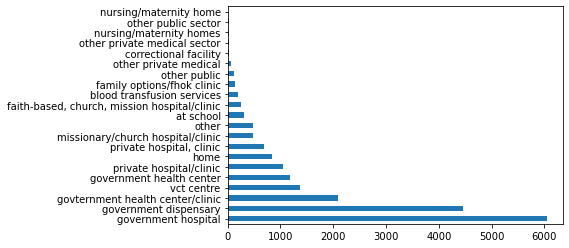

In [57]:
df["last_hiv_test_facility"].value_counts().plot.barh()
df["last_hiv_test_facility"].unique().tolist()


<AxesSubplot:>

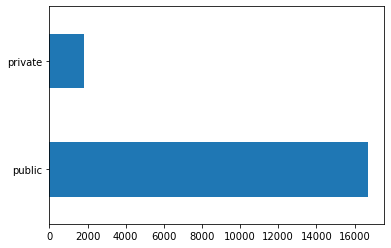

In [58]:
df["last_hiv_test_sector"] = df["last_hiv_test_facility"].replace(
    {
        "vct centre": "public",  ### ???
        "private hospital/clinic": "private",
        "govternment health center/clinic": "public",
        "home": np.nan,
        "government hospital": "public",
        "at school": "public",
        "government dispensary": "public",
        "nursing/maternity homes": "public",  ### ???
        "missionary/church hospital/clinic": "public",
        "other": np.nan,
        "blood transfusion services": "public",  ### ???
        "other public sector": "public",
        "other private medical sector": "private",
        "correctional facility": "public",
        "family options/fhok clinic": "public",  ### ???
        "government health center": "public",
        "private hospital, clinic": "private",
        "faith-based, church, mission hospital/clinic": "public",
        "other public": "public",
        "other private medical": "private",
        "nursing/maternity home": "public",
    }
)

df["last_hiv_test_sector"].value_counts().plot.barh()


##### Who pays medication

In [59]:
# df["who_pays_medication"].value_counts().plot.barh()
# df["who_pays_medication"].unique().tolist()


In [60]:
# df["medication_payment"] = df["who_pays_medication"].replace(
#     {
#         "provided by public clinic or hospital": "public",
#         "medical aid": "private",  # NOTE: COUNTING MEDICAL AID AS PRIVATE
#         "family/friend": "private",
#         "respondent": "private",
#         "employer": "private",
#         "other": np.nan,
#     }
# )

# df["medication_payment"].value_counts().plot.barh()


##### family_planning_last_source

['private hospital, clinic',
 nan,
 'pharmacy/chemist',
 'government health center',
 'mobile clinic',
 'government hospital',
 'friend/relative',
 'government dispensary',
 'faith based, church, mission hospital/clinic',
 'nursing/maternity home',
 'shop',
 'other private medical',
 'other',
 'community health worker',
 'family options/fhok clinic',
 'community-based distributor',
 'other public sector']

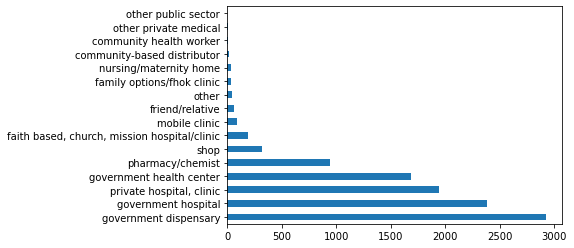

In [61]:
df["family_planning_last_source"].value_counts().plot.barh()
df["family_planning_last_source"].unique().tolist()


<AxesSubplot:>

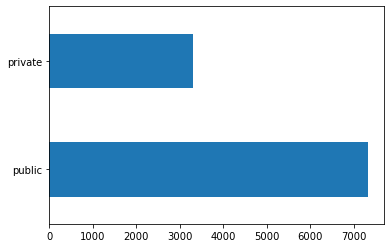

In [62]:
df["family_planning_last_source_sector"] = df["family_planning_last_source"].replace(
    {
        "private hospital, clinic": "private",
        "pharmacy/chemist": "private",
        "government health center": "public",
        "mobile clinic": "public",
        "government hospital": "public",
        "friend/relative": "private",
        "government dispensary": "public",
        "faith based, church, mission hospital/clinic": "public",
        "nursing/maternity home": "private",
        "shop": "private",
        "other private medical": "private",
        "other": np.nan,
        "community health worker": "public",
        "family options/fhok clinic": "public",
        "community-based distributor": "public",
        "other public sector": "public",
    }
)

df["family_planning_last_source_sector"].value_counts().plot.barh()


##### family_planning_first_source_of_current

['private hospital, clinic',
 nan,
 'friend/relative',
 'government health center',
 'government hospital',
 'other',
 'faith based, church, mission hospital/clinic',
 'pharmacy/chemist',
 'nursing/maternity home',
 'mobile clinic',
 'government dispensary',
 'shop',
 'community health worker',
 'community-based distributor',
 'family options/fhok clinic',
 'other public sector',
 'other private medical']

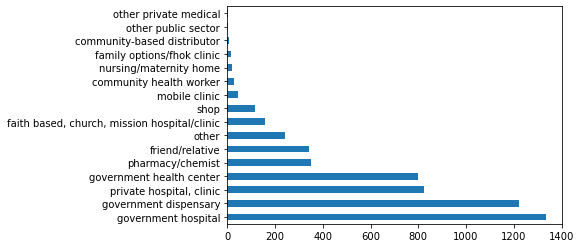

In [63]:
df["family_planning_first_source"].value_counts().plot.barh()
df["family_planning_first_source"].unique().tolist()


<AxesSubplot:>

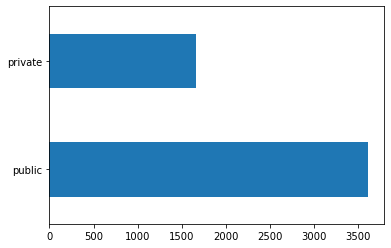

In [64]:
df["family_planning_first_source_sector"] = df["family_planning_first_source"].replace(
    {
        "private hospital, clinic": "private",
        "pharmacy/chemist": "private",
        "government health center": "public",
        "mobile clinic": "public",
        "government hospital": "public",
        "friend/relative": "private",
        "government dispensary": "public",
        "faith based, church, mission hospital/clinic": "public",
        "nursing/maternity home": "private",
        "shop": "private",
        "other private medical": "private",
        "other": np.nan,
        "community health worker": "public",
        "family options/fhok clinic": "public",
        "community-based distributor": "public",
        "other public sector": "public",
    }
)

df["family_planning_first_source_sector"].value_counts().plot.barh()


##### place of delivery

[nan,
 'private hospital/clinic',
 "respondent's home",
 'govt health center',
 'government hospital',
 'govt dispensary',
 'other home',
 'mission hospital/clinic',
 'other',
 'nursing/maternity home',
 'other private sector',
 'other public sector']

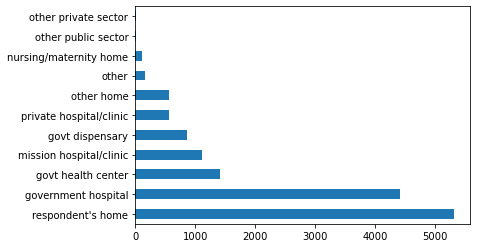

In [65]:
df["place_of_delivery"].value_counts().plot.barh()
df["place_of_delivery"].unique().tolist()


<AxesSubplot:>

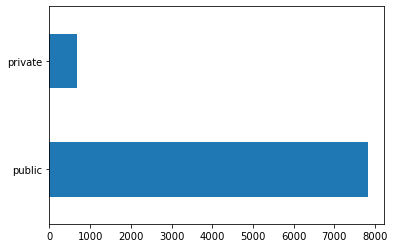

In [66]:
df["place_of_delivery_sector"] = df["place_of_delivery"].replace(
    {
        "private hospital/clinic": "private",
        "respondent's home": np.nan,
        "govt health center": "public",
        "government hospital": "public",
        "govt dispensary": "public",
        "other home": np.nan,
        "mission hospital/clinic": "public",
        "other": np.nan,
        "nursing/maternity home": "private",
        "other private sector": "private",
        "other public sector": "public",
    }
)

df["place_of_delivery_sector"].value_counts().plot.barh()


##### post_birth_check_source

In [67]:
# df["post_birth_check_source"].value_counts().plot.barh()
# df["post_birth_check_source"].unique().tolist()

In [68]:
# df["post_birth_check_source_sector"] = df["post_birth_check_source"].replace(
#     {
#         "government clinic/comm. health center": "public",
#         "government hospital": "public",
#         "private hospital/doctor": "private",
#         "other home": np.nan,
#         "respondent's home": np.nan,
#         "mobile clinic": "public",
#     }
# )

# df["post_birth_check_source_sector"].value_counts().plot.barh()


##### baby_first_check_source

[nan,
 "respondent's home",
 'government health center',
 'other home',
 'government hospital',
 'private mission hospital, clinic',
 'private hospital/ clinic',
 'government dispensary',
 'nursing, maternity home',
 'other',
 'other private sector',
 'other public sector']

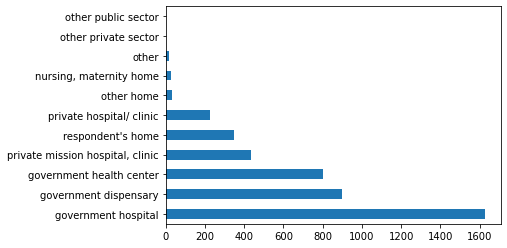

In [69]:
df["baby_first_check_source"].value_counts().plot.barh()
df["baby_first_check_source"].unique().tolist()

<AxesSubplot:>

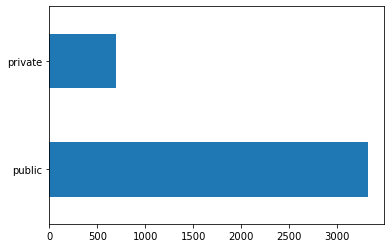

In [70]:
df["baby_first_check_source_sector"] = df["baby_first_check_source"].replace(
    {
        "respondent's home": np.nan,
        "government health center": "public",
        "other home": np.nan,
        "government hospital": "public",
        "private mission hospital, clinic": "private",
        "private hospital/ clinic": "private",
        "government dispensary": "public",
        "nursing, maternity home": "private",
        "other": np.nan,
        "other private sector": "private",
        "other public sector": "public",
    }
)

df["baby_first_check_source_sector"].value_counts().plot.barh()

##### Dental care source

In [71]:
# ### public
# # s1405a	place for medical, dental treatment: government hospital
# # s1405b	place for medical, dental treatment: government clinical/community health centre
# # s1405c	place for medical, dental treatment: other public sector
# ### private
# # s1405d	place for medical, dental treatment: private hospital/clinic/doctor
# # s1405e	place for medical, dental treatment: chemist/pharmacy
# # s1405f	place for medical, dental treatment: dentist/hygienist/therapist
# # s1405g	place for medical, dental treatment: other private sector
# # s1405h	place for medical, dental treatment: workplace health service
# # s1405i	place for medical, dental treatment: traditional healer
# # s1405j	place for medical, dental treatment: traditional herbalist
# # s1405k	place for medical, dental treatment: faith healer
# ### other
# # s1405x	place for medical, dental treatment: other

# public_vars = ["s1405a", "s1405b", "s1405c"]
# private_vars = [
#     "s1405d",
#     "s1405e",
#     "s1405f",
#     "s1405g",
#     "s1405h",
#     "s1405i",
#     "s1405j",
#     "s1405k",
# ]
# # 's1405x' # other

# # convert to single variable with "private", "public" or NaN entries
# public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
# private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

# df["dental_care_sector"] = np.select(
#     [private_bool, public_bool], ["private", "public"], default="unknown"
# )
# df["dental_care_sector"] = df["dental_care_sector"].replace({"unknown": np.nan})
# # df['dental_care_sector']

# df["dental_care_sector"].value_counts().plot.barh()


##### Antenatal care source

<AxesSubplot:>

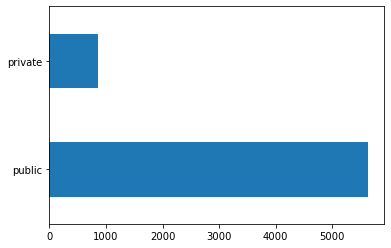

In [72]:
### public
# m57e_1	antenatal care: government hospital
# m57f_1	antenatal care: government clinic/comm. health center
# m57g_1	antenatal care: mobile clinic
# m57h_1	antenatal care: other public sector
### private
# m57m_1	antenatal care: private hospital/doctor
# m57n_1	antenatal care: other private medical sector
### unknown
# m57a_1	antenatal care: respondent's home
# m57b_1	antenatal care: other home
# m57x_1	antenatal care: other

public_vars = ["m57e_1", "m57f_1", "m57g_1", "m57h_1"]
private_vars = ["m57m_1", "m57n_1"]
# 'm57a_1', # other # home
# 'm57b_1', # other # home
# 'm57x_1' # other


# convert to single variable with "private", "public" or NaN entries
public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

df["antenatal_care_sector"] = np.select(
    [private_bool, public_bool], ["private", "public"], default="unknown"
)
df["antenatal_care_sector"] = df["antenatal_care_sector"].replace({"unknown": np.nan})
# df['antenatal_care_sector']

df["antenatal_care_sector"].value_counts().plot.barh()


##### baby_fevercough_source

<AxesSubplot:>

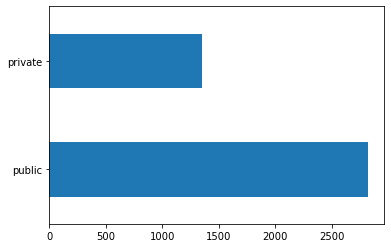

In [73]:
### public
# h32a_1	fever/cough: government hospital
# h32b_1	fever/cough: government clinic/comm. health centre
# h32c_1	fever/cough: mobile clinic
# h32d_1	fever/cough: community health worker
# h32e_1	fever/cough: other public sector
### private
# h32j_1	fever/cough: private hospital/ clinic
# h32k_1	fever/cough: private pharmacy
# h32l_1	fever/cough: private doctor
# h32m_1	fever/cough: other private sector
# h32s_1	fever/cough: supermarket/shop
# h32t_1	fever/cough: traditional healer
# h32u_1	fever/cough: market
### unknown
# h32x_1	fever/cough: other

public_vars = ["h32a_1", "h32b_1", "h32c_1", "h32d_1", "h32e_1"]
private_vars = ["h32j_1", "h32k_1", "h32l_1", "h32m_1", "h32s_1", "h32t_1", "h32u_1"]
# 'h32x_1', # other

# convert to single variable with "private", "public" or NaN entries
public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

df["baby_fevercough_sector"] = np.select(
    [private_bool, public_bool], ["private", "public"], default="unknown"
)
df["baby_fevercough_sector"] = df["baby_fevercough_sector"].replace({"unknown": np.nan})
# df['baby_fevercough_sector']

df["baby_fevercough_sector"].value_counts().plot.barh()


##### sought_sti_advice_source

<AxesSubplot:>

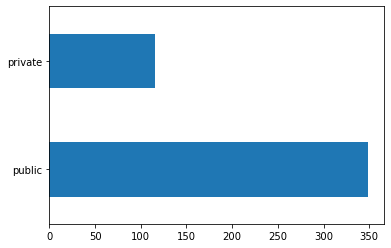

In [74]:
### public
# v770a	sought sti advice/treatment from: government hospital
# v770b	sought sti advice/treatment from: government clinic/community health worker
# v770c	sought sti advice/treatment from: mobile/temporary hct services
# v770d	sought sti advice/treatment from: other public sector

# v770l	sought sti advice/treatment from: new start testing site

### private
# v770k	sought sti advice/treatment from: private hospital/clinic/doctor
# v770m	sought sti advice/treatment from: chemist/pharmacy
# v770n	sought sti advice/treatment from: other private medical sector
# v770t	sought sti advice/treatment from: shop
# v770u	sought sti advice/treatment from: traditional herbalist
# v770v	sought sti advice/treatment from: traditional healer
### unknown
# v770x	sought sti advice/treatment from: other

public_vars = ["v770a", "v770b", "v770c", "v770d", "v770l"]
private_vars = ["v770k", "v770m", "v770n", "v770t", "v770u", "v770v"]
# 'v770x', # other

# convert to single variable with "private", "public" or NaN entries
public_bool = (df[public_vars] == "yes").sum(axis=1) > 0
private_bool = (df[private_vars] == "yes").sum(axis=1) > 0

df["sti_advice_sector"] = np.select(
    [private_bool, public_bool], ["private", "public"], default="unknown"
)
df["sti_advice_sector"] = df["sti_advice_sector"].replace({"unknown": np.nan})
# df['sti_advice_sector']

df["sti_advice_sector"].value_counts().plot.barh()


In [75]:
# target_dict = {
#     'v842':'antenatal_hiv_test_source', # duplicated info from both other vars?
# }


# Check dataset and save to file

In [76]:
vars_to_discard = [
    "has_health_insurance_DHS",
    # "has_health_insurance_AHS",
    # "who_pays_medication",
    "family_planning_last_source",
    "family_planning_first_source",
    "antenatal_hiv_test_source",
    "place_of_delivery",
    # "post_birth_check_source",
    "baby_first_check_source",
]

df.drop(vars_to_discard + new_onehot_target_list, axis=1, inplace=True)


In [77]:
df.columns

Index(['cluster', 'household', 'line', 'source_dhs', 'visitor_or_not',
       'dhs_sample_weight', 'dhs_primary_sampling_unit', 'dhs_sample_stratum',
       'last_hiv_test_facility', 'gender', 'age_group', 'ethnicity',
       'wealth_bracket', 'education_attainment', 'urban_rural',
       'occupation_group', 'sons_at_home', 'daughters_at_home', 'homeowner',
       'years_in_residence', 'relationship_to_head', 'sex_of_head',
       'age_of_head', 'literacy', 'marital_status', 'freq_newspaper_mag',
       'freq_radio', 'freq_tv', 'current_contraceptive_method',
       'age_at_first_sex', 'ever_heard_of_sti', 'ever_heard_of_aids',
       'had_sti_past_year', 'ever_hiv_tested', 'know_place_hiv_test',
       'heard_of_other_sti', 'used_condom_last', 'district', 'region',
       'region_from_survey', 'n_children_at_home', 'reads_newspaper_mag',
       'listens_radio', 'watches_tv', 'employed', 'age_group_2',
       'has_health_insurance', 'last_hiv_test_sector',
       'family_planning_last_

In [78]:
df.shape


(42111, 55)

In [79]:
# save to file
df.to_csv(output_path + "DHS_Kenya_chosen_cleaned_all_new_targets.csv", index=False)

# Scraps

In [57]:
# replace_map = {
#     # ethnicity forward_slash replacement
#     'ethnicity':{
#         'black/african':'black_slash_african',
#         'indian/asian':'indian_slash_asian'
#     },

#     # Employment
#     'employed':{
#         'not working':'unemployed', # unemployed
#         'clerical':'employed',
#         'skilled manual':'employed',
#         'unskilled manual':'employed',
#         'household and domestic':'employed',
#         'professional/technical/managerial':'employed',
#         "don't know":np.nan, # unknown
#         'agriculture - unskilled':'employed',
#         'services':'employed',
#         'agricultural - unskilled':'employed',
#         'agricultural - self employed':'employed',
#         'agriculture - self employed':'employed'
#     },
#     # Age groups
#     'age_group_2':{
#         '15-19':'adolescent',
#         '20-24':'young adult',
#         '25-29':'adult',
#         '30-34':'adult',
#         '35-39':'adult',
#         '40-44':'middle-aged',
#         '45-49':'middle-aged',
#     },

#     # last_hiv_test_facility
#     'last_hiv_test_sector':{
#         'government clinic/community health centre':'public',
#         'government hospital':'public',
#         'mobile/temporary hct services':'public',
#         'workplace':'private',
#         'private hospital, clinic or doctor':'private',
#         'private hospital/clinic/private doctor':'private',
#         'new start testing site':'public',
#         'other':'unknown', # TEST size,
#         'home':'unknown', # Private/Public? TEST size.
#         'other public sector':'public',
#         'pharmacy':'private',
#         'other private medical sector':'private',
#         'chemist/pharmacy':'private',
#         'correctional facility':'public',
#     },
# }
# df = df.replace(replace_map)
